In [1]:
%pylab inline
import datetime as dt
from davitpy.models import raydarn
import davitpy
import pandas
import numpy as np
import os

Re = davitpy.utils.Re

Populating the interactive namespace from numpy and matplotlib


In [2]:
sTime = dt.datetime(2012, 9, 20, 1, 0)
eTime = dt.datetime(2012, 9, 20, 1, 0)
UTstart = sTime.hour + sTime.minute/60.
UTend = eTime.hour + eTime.minute/60.
radar = 'sas'
beam = 3
freq = 14
elev = (8, 45, 0.1)


In [3]:
# Run the ray tracing for the specified period, radar, beam and frequency
# Use 4 threads (MPI) and output everything to /tmp

try:
    os.remove('/tmp/iscat.0.dat')
except:
    pass
try:
    os.remove('/tmp/gscat.0.dat')
except:
    pass

rto = raydarn.RtRun(sTime, eTime, 
    rCode=radar, beam=beam, freq=freq, 
    outDir='/tmp', nprocs=4,elev=elev)

In [4]:
# Read rays into memory
rto.readRays()

In [5]:
#rto.rays.paths[dt.datetime(2012, 9, 20, 7, 0)]

In [6]:
#rto.elev

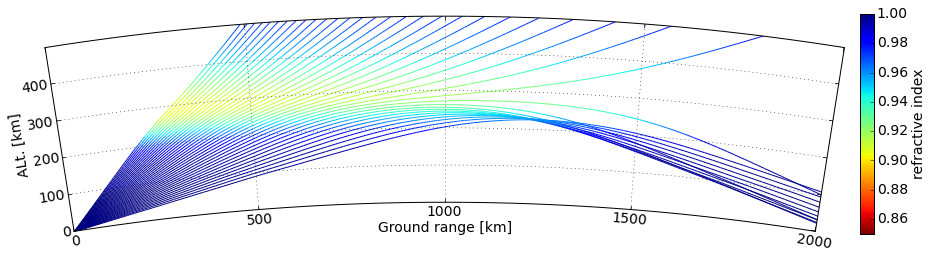

In [7]:
# Plot rays with refractive index color scale
# Plot 1 ray in 10 (1deg increment)
# Plot at start time
figure(figsize=(15,5))
rcParams.update({'font.size': 14})

ax, aax, cbax = rto.rays.plot(sTime, step=10, showrefract=True, nr_lim=[.85,1])

ax.grid()

In [8]:
# Read electron densities into memory
rto.readEdens()

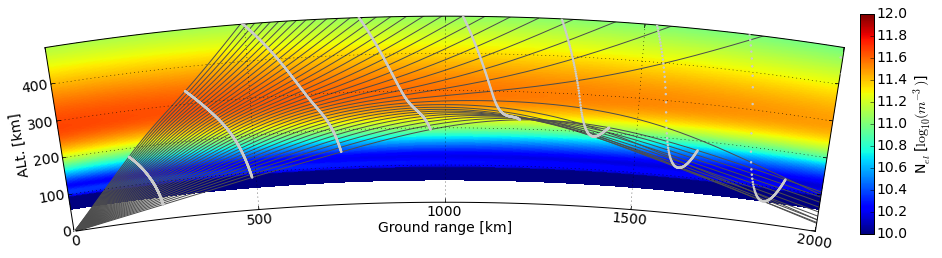

In [9]:
# Plot rays and electron densities together
# Plot at start time
# Plot range markers (every 250 km)
figure(figsize=(15,5))
rcParams.update({'font.size': 14})

ax, aax, cbax = rto.ionos.plot(sTime)
ax, aax, cbax = rto.rays.plot(sTime, 
    step=10, ax=ax, aax=aax)
rto.rays.showRange()

ax.grid()

In [10]:
# Read ionospheric and ground scatter into memory
rto.readScatter()

In [11]:
# rto.rays.writeToAscii('/home/davitpy/Desktop/rays.txt')

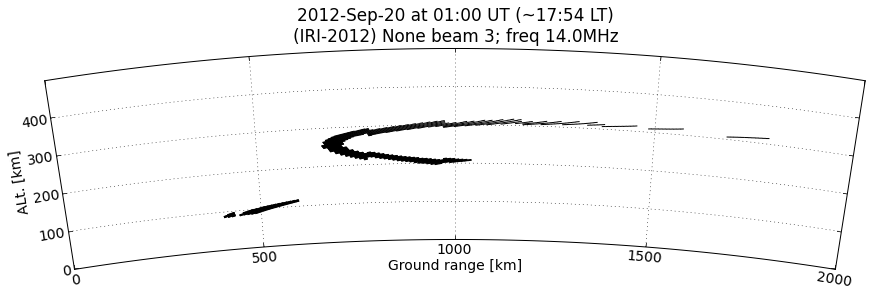

In [12]:
# Plot ionospheric and ground scatter together
# Plot at start time
# Plot relative strength of ionospheric scatter
figure(figsize=(15,5))
rcParams.update({'font.size': 14})

ax, aax, cax = rto.scatter.plot(sTime, title=True, weighted=False)

ax.grid()

In [13]:
#rto.scatter.isc

In [14]:
kt = rto.scatter.isc.keys()[0]
kb = rto.scatter.isc[kt].keys()[0]


In [15]:
dict_list = []
for kt in rto.scatter.isc.keys():
    for kb in rto.scatter.isc[kt].keys():
        elv_dict = rto.scatter.isc[kt][kb]
        for key,value in elv_dict.items():
            for ii in range(value['nstp']):
                tmp_dict = {'time':kt,'beam':kb,'elv_init':key,'radar':radar}
                for param,param_val in value.items():
                    if param == 'nstp': continue
                    tmp_dict[param] = param_val[ii]
                dict_list.append(tmp_dict)

In [16]:
df = pandas.DataFrame(dict_list)

In [17]:
#This code creates an additional dictionary list and DataFrame that identifies the elevation
#angles of all rays that are reflected by the ionosphere and backscattered by the ground.
#Knowledge of the highest elevation angle ground-backscattered ray greatly simplifies the 
#estimation of the refractive indices and great-circle distances to the scatter volumes.
#Currently the DataFrame does not include the great circle distance of the ground scatter.
#This will be an important addition and should be relatively easy to do, especially if the
# code is extended to estimate 1 1/2 hop scatter modes.

dict_list_gs = []
for kt in rto.scatter.gsc.keys():
    for kb in rto.scatter.gsc[kt].keys():
        elv_dict_gs = rto.scatter.gsc[kt][kb]
        for key,value in elv_dict_gs.items():
            tmp_dict_gs = {'time':kt, 'beam':kb, 'elv_init':key, 'radar':radar}
            dict_list_gs.append(tmp_dict_gs)
                             

In [18]:
dgs = pandas.DataFrame(dict_list_gs)

In [19]:
#The two-parameter analysis runs from the highest elevation-angle ray that detects scatter to the
#lowest. To accomplish this, both the df and dgs DataFrames need to be re-sorted and reindexed to run
#from high to low elevation angles. The re-sorted rays can be slassified into three groups.
#Group 1:Rays that refract sufficiently to be backscattered and then quickly penetrate the ionosphere.
#Group 2: Rays that backscatter below the peak of the F-region and again above the peak of the F-layer
#after which they penetrate the ionosphere. Group 3: Rays that backscatter below the peak of the F-layer
#and then are reflected by the ionosphere. Each group is processed by its associated phase of the
#analysis.

dgs.sort('elv_init', ascending=False, inplace=True)

In [20]:
dgs.reset_index(drop=True, inplace=True)

In [21]:
dgs.head(64)

,beam,elv_init,radar,time
0,3,18.1,sas,2012-09-20 01:00:00
1,3,18.0,sas,2012-09-20 01:00:00
2,3,17.9,sas,2012-09-20 01:00:00
3,3,17.8,sas,2012-09-20 01:00:00
4,3,17.7,sas,2012-09-20 01:00:00
5,3,17.6,sas,2012-09-20 01:00:00
6,3,17.5,sas,2012-09-20 01:00:00
7,3,17.4,sas,2012-09-20 01:00:00
8,3,17.3,sas,2012-09-20 01:00:00
9,3,17.2,sas,2012-09-20 01:00:00


In [22]:
del df['w']

In [23]:
#The peak electron density of the F-region ionosphere undergoes significant variation 
#in the course of a day. This variation requires a minimum of two operating 
#frequencies: one for daytime operation and one for nighttime operation. A third
#intermediate frequency might also be desirable for the dawn and dusk transitions. One
#can assure similar propagagion conditions, if the ground scatter footprint of a 
# signal at a specific initial elevation angle remains at  a similiar great circle
#distance. The equations below are used to identify the local time of the UT time that
#is being processed. The minimum ionospheric electron density occurs 1-2 hours before 
#local dawn, while the maximum density occurs a few hours afer local noon.

hysteresis = 2.
df['Loc_time'] = (df['time'][0].hour + df['time'][0].minute/60. + df['lon']/15. - hysteresis) % 24.

In [24]:
df.describe()

,beam,elv_init,gran,h,lat,lon,nr,r,rel,th,Loc_time
count,1434,1434.000000,1434.000000,1434,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000
mean,3,15.108647,877301.255230,10000,59.323466,-104.603083,0.949674,6597565.600070,10.018506,0.125771,16.026461
std,0,4.872442,244736.361931,0,1.902850,0.581387,0.028219,64649.906674,1.536428,0.033629,0.038759
min,3,8.000000,425000.000000,10000,55.777016,-105.609512,0.913672,6455822.500000,4.643173,0.063140,15.959366
25%,3,9.825000,775000.000000,10000,58.387214,-104.891163,0.921922,6578337.125000,9.108961,0.109179,16.007256
50%,3,15.400000,855000.000000,10000,59.082882,-104.690102,0.949358,6601058.000000,9.946294,0.121544,16.020660
75%,3,19.800000,975000.000000,10000,60.259570,-104.341038,0.970228,6649579.000000,10.750784,0.142360,16.043931
max,3,22.000000,1995000.000000,10000,67.982475,-101.670189,0.999136,6686645.500000,13.954424,0.278941,16.221987


In [25]:
df['lgc_rt']=df['th'] * Re

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 0 to 1433
Data columns (total 14 columns):
beam        1434 non-null int64
elv_init    1434 non-null float64
gran        1434 non-null float64
h           1434 non-null float64
lat         1434 non-null float64
lon         1434 non-null float64
nr          1434 non-null float64
r           1434 non-null float64
radar       1434 non-null object
rel         1434 non-null float64
th          1434 non-null float64
time        1434 non-null datetime64[ns]
Loc_time    1434 non-null float64
lgc_rt      1434 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(1), object(1)
memory usage: 168.0+ KB


In [27]:
df.head(18)

,beam,elv_init,gran,h,lat,lon,nr,r,radar,rel,th,time,Loc_time,lgc_rt
0,3,8.5,485000,10000,56.324730,-105.462639,0.999005,6458568.5,sas,12.491806,0.072817,2012-09-20 01:00:00,15.969157,463.915431
1,3,8.5,495000,10000,56.410164,-105.439560,0.998227,6461015.0,sas,12.380327,0.074327,2012-09-20 01:00:00,15.970696,473.539450
2,3,8.5,505000,10000,56.495537,-105.416435,0.997411,6463499.5,sas,12.242514,0.075837,2012-09-20 01:00:00,15.972238,483.157677
3,3,8.5,515000,10000,56.580864,-105.393280,0.996727,6465893.0,sas,12.128212,0.077346,2012-09-20 01:00:00,15.973781,492.769639
4,3,8.5,525000,10000,56.666134,-105.370087,0.996254,6468144.5,sas,12.063756,0.078853,2012-09-20 01:00:00,15.975328,502.375097
5,3,8.5,535000,10000,56.751350,-105.346848,0.995985,6470248.5,sas,12.060826,0.080360,2012-09-20 01:00:00,15.976877,511.973815
6,3,8.5,545000,10000,56.836517,-105.323570,0.995861,6472261.5,sas,12.098912,0.081866,2012-09-20 01:00:00,15.978429,521.565793
7,3,8.5,555000,10000,56.921638,-105.300255,0.995821,6474212.0,sas,12.166307,0.083370,2012-09-20 01:00:00,15.979983,531.151268
8,3,8.5,565000,10000,57.006702,-105.276901,0.995817,6476142.0,sas,12.245445,0.084874,2012-09-20 01:00:00,15.981540,540.730334
9,3,8.5,575000,10000,57.091713,-105.253517,0.995824,6478066.0,sas,12.330472,0.086376,2012-09-20 01:00:00,15.983099,550.303135


In [28]:
df['height']=df['r']/1000.-Re

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 0 to 1433
Data columns (total 15 columns):
beam        1434 non-null int64
elv_init    1434 non-null float64
gran        1434 non-null float64
h           1434 non-null float64
lat         1434 non-null float64
lon         1434 non-null float64
nr          1434 non-null float64
r           1434 non-null float64
radar       1434 non-null object
rel         1434 non-null float64
th          1434 non-null float64
time        1434 non-null datetime64[ns]
Loc_time    1434 non-null float64
lgc_rt      1434 non-null float64
height      1434 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 179.2+ KB


In [30]:
df['h_2p'] = np.sqrt(Re**2 + (df['gran']*1e-3)**2 + 2*(df['gran']*1e-3)*Re*np.sin(df['elv_init']*np.pi/180.)) - Re
df['h_2p'].describe()

count    1434.000000
mean      291.577634
std       136.113890
min        89.017760
25%       233.086441
50%       261.618323
75%       350.952697
max       878.237566
Name: h_2p, dtype: float64

In [31]:
#The minimum height of the peak of the F-region electron density profile occurs a few hours
#after local noon and the minimum height occurs a few hours before dawn. EUV photons emitted
#by the sun is the principal process for creation of the ionosphere and 3-body recombination
#is the principal process for its decay. THe third body in the reaction is a neutral atom. Since
#the neutral density of the upper atmosphere decreases with altitude, the ionosphere after sunset
#decays from the bottom up. This equation is used in the 2-parameter analysis to mirror the
#in height of the ionosphere over a day. The changes in virtual height affect the Earth-centered
#included by the group path and the initial elevation angle and ultimately impact the great-circle
#distance of the scattering volume. The expression below optimmizes the diurnal variation of the
#virtual height and great-circle distance.

tmp = []
for index,row in df.iterrows():
    h_2p_max = 600. + 100*np.cos(row['Loc_time']*np.pi/12.)  #use 2000 for pure 2p-method, 550 for modified 2p-method
    if row['h_2p'] > h_2p_max:
        row['h_2p'] = h_2p_max
    tmp.append(row)    
df = pandas.DataFrame(tmp)
del tmp
df['h_2p'].describe()


count    1434.000000
mean      286.067304
std       120.500117
min        89.017760
25%       233.086441
50%       261.618323
75%       350.952697
max       555.114588
Name: h_2p, dtype: float64

In [32]:
df['th_2p']  = np.arcsin((df['gran']*1e-3)*np.cos(df['elv_init']*np.pi/180.) / (Re + df['h_2p']))
df['lgc_2p'] = df['th_2p'] * Re
print 

In [33]:
df['nr_2p'] = np.zeros_like(df['th_2p'], dtype=np.float)
size = df['th_2p'].size
df['phase'] = np.zeros_like(df['beam'], dtype = np.int64)

In [34]:
df['lat_2p'], df['lon_2p'] = davitpy.utils.greatCircleMove(rto.site.geolat, rto.site.geolon, df['lgc_2p'], rto.azim[0]) 

In [35]:
df.sort(['elv_init', 'gran'], ascending=[False, True], inplace=True)
print size

1434


In [36]:
df.reset_index(drop=True, inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 0 to 1433
Data columns (total 22 columns):
beam        1434 non-null int64
elv_init    1434 non-null float64
gran        1434 non-null float64
h           1434 non-null float64
lat         1434 non-null float64
lon         1434 non-null float64
nr          1434 non-null float64
r           1434 non-null float64
radar       1434 non-null object
rel         1434 non-null float64
th          1434 non-null float64
time        1434 non-null datetime64[ns]
Loc_time    1434 non-null float64
lgc_rt      1434 non-null float64
height      1434 non-null float64
h_2p        1434 non-null float64
th_2p       1434 non-null float64
lgc_2p      1434 non-null float64
nr_2p       1434 non-null float64
phase       1434 non-null int64
lat_2p      1434 non-null float64
lon_2p      1434 non-null float64
dtypes: datetime64[ns](1), float64(18), int64(2), object(1)
memory usage: 257.7+ KB


In [38]:
see = ['elv_init','gran','height','h_2p', 'th', 'th_2p']
df[see].tail(80)

,elv_init,gran,height,h_2p,th,th_2p
1354,8.3,565000,103.8415,105.736794,0.084942,0.086429
1355,8.3,575000,105.7545,108.036453,0.086446,0.087931
1356,8.3,585000,107.6665,110.350726,0.087949,0.089433
1357,8.3,595000,109.5515,112.679595,0.089452,0.090933
1358,8.3,605000,111.3815,115.023047,0.090953,0.092432
1359,8.3,615000,113.1990,117.381064,0.092453,0.093930
1360,8.3,985000,197.6610,214.716507,0.147258,0.148545
1361,8.3,995000,199.2030,217.615619,0.148722,0.149998
1362,8.3,1005000,200.5410,220.528627,0.150185,0.151450
1363,8.3,1015000,201.6895,223.455513,0.151647,0.152900


In [39]:
df.head(64)


,beam,elv_init,gran,h,lat,lon,nr,r,radar,rel,...,Loc_time,lgc_rt,height,h_2p,th_2p,lgc_2p,nr_2p,phase,lat_2p,lon_2p
0,3,22.0,795000,10000,58.395752,-104.888824,0.914243,6648597.0,sas,10.946948,...,16.007412,696.162201,277.5970,338.425429,0.110084,701.346748,0,0,58.385973,-104.750644
1,3,22.0,805000,10000,58.472141,-104.866989,0.913949,6650487.5,sas,10.876927,...,16.008867,704.736140,279.4875,343.173215,0.111396,709.700919,0,0,58.459964,-104.725741
2,3,22.0,815000,10000,58.548481,-104.845116,0.913759,6652367.0,sas,10.836088,...,16.010326,713.306757,281.3670,347.932529,0.112705,718.043268,0,0,58.533845,-104.700769
3,3,22.0,825000,10000,58.624809,-104.823204,0.913672,6654248.0,sas,10.824423,...,16.011786,721.873955,283.2480,352.703347,0.114013,726.373793,0,0,58.607616,-104.675727
4,3,22.0,835000,10000,58.701103,-104.801239,0.913689,6656139.0,sas,10.841923,...,16.013251,730.437879,285.1390,357.485645,0.115318,734.692490,0,0,58.681278,-104.650614
5,3,22.0,845000,10000,58.777367,-104.779243,0.913810,6658041.5,sas,10.888596,...,16.014717,738.998289,287.0415,362.279398,0.116622,742.999357,0,0,58.754830,-104.625432
6,3,21.9,785000,10000,58.324265,-104.909225,0.914940,6645884.0,sas,10.944031,...,16.006052,688.162526,274.8840,332.481566,0.108868,693.595725,0,0,58.317320,-104.773655
7,3,21.9,795000,10000,58.400723,-104.887405,0.914500,6647758.0,sas,10.830256,...,16.007506,696.747620,276.7580,337.203277,0.110182,701.970633,0,0,58.391499,-104.748787
8,3,21.9,805000,10000,58.477173,-104.865547,0.914164,6649599.5,sas,10.745682,...,16.008964,705.329344,278.5995,341.936564,0.111495,710.333745,0,0,58.465568,-104.723850
9,3,21.9,815000,10000,58.553581,-104.843651,0.913931,6651432.0,sas,10.690284,...,16.010423,713.907840,280.4320,346.681402,0.112806,718.685057,0,0,58.539529,-104.698843


In [40]:
# Determine the "phase" of the analysis.
#   Phase 1: Radar rays with same initial elevation angle are typically spaced approx. 10 km apart
#            but always less than 50 km apart
#   Phase 2: Radar rays with same initial elevation angle are spaced greater than 50 km apart
#   Phase 3: Radar rays are ground scatter rays.

phase_nr  = np.zeros([len(df)],dtype=np.int)
gran_diff = df.gran.diff()
first     = (np.where(gran_diff > 50000)[0]).min()
phase_nr[:first] = 1

# Make all entries of the elevation angle where the transition occurs a phase 2.
tmp_elv_init = df['elv_init'].loc[first]
tf = np.array( df['elv_init'] == tmp_elv_init)
phase_nr[tf] = 2

max_elv_init_gs = dgs['elv_init'][0]
tf = np.array( df['elv_init'] < max_elv_init_gs )

phase_nr[tf] = 3
phase_nr[phase_nr == 0] = 2
df['phase'] = phase_nr

In [41]:
def calc_nr(elv_init,th_2p,inclination_init):
    nr_2p = np.sin((90-elv_init-th_2p*180./np.pi)*np.pi/180.)/inclination_init
    return nr_2p

In [42]:
nr_2p = np.zeros([len(df)],dtype=np.float)
#nr_2p[0] = calc_nr(df['elv_init'][0], df['th_2p'][0])
for index, row in df.iterrows():
    inclination_init = np.sin((75.3 + 0.6*(Re*row['th_2p'])/112.)*np.pi/180.)
    if index == 0:
        nr_2p[index] = calc_nr(row['elv_init'], row['th_2p'],inclination_init)
        last_nr_2p = nr_2p[index]
    elif row['elv_init'] <  last_elv and row['phase'] == 1:
        nr_2p[index] = calc_nr(row['elv_init'], row['th_2p'], inclination_init)
        last_nr_2p = nr_2p[index]
    elif row['elv_init'] == last_elv and row['phase'] == 1:
        nr_2p[index] = last_nr_2p #*inclination_init/np.sin((75.3 + 0.6*(Re*row['th_2p'])/112.)*np.pi/180.)
    elif row['elv_init'] <  last_elv and row['phase'] == 2:
        nr_2p[index] = calc_nr(row['elv_init'], row['th_2p'], inclination_init)
        last_nr_2p = nr_2p[index]
    elif row['elv_init'] == last_elv and row['phase'] == 2:
        nr_2p[index] = last_nr_2p*inclination_init/np.sin((75.3 + 0.6*(Re*row['th_2p'])/112.)*np.pi/180.)
    elif row['phase'] == 3:
        nr_2p[index] = calc_nr(row['elv_init'], row['th_2p'], inclination_init)

    last_elv   = row['elv_init']
    #print index,row['elv_init'], nr_2p[index]
    
df['nr_2p'] = nr_2p

In [43]:
nr_offset = df['nr'].mean() - df['nr_2p'].mean()
print nr_offset
df['nr_2p'] = df['nr_2p'] + nr_offset

0.00619666222571


In [44]:
df.head(64)
#The table below displays the organization of the re-sorted and reindexed df DataFrame

,beam,elv_init,gran,h,lat,lon,nr,r,radar,rel,...,Loc_time,lgc_rt,height,h_2p,th_2p,lgc_2p,nr_2p,phase,lat_2p,lon_2p
0,3,22.0,795000,10000,58.395752,-104.888824,0.914243,6648597.0,sas,10.946948,...,16.007412,696.162201,277.5970,338.425429,0.110084,701.346748,0.902918,1,58.385973,-104.750644
1,3,22.0,805000,10000,58.472141,-104.866989,0.913949,6650487.5,sas,10.876927,...,16.008867,704.736140,279.4875,343.173215,0.111396,709.700919,0.902918,1,58.459964,-104.725741
2,3,22.0,815000,10000,58.548481,-104.845116,0.913759,6652367.0,sas,10.836088,...,16.010326,713.306757,281.3670,347.932529,0.112705,718.043268,0.902918,1,58.533845,-104.700769
3,3,22.0,825000,10000,58.624809,-104.823204,0.913672,6654248.0,sas,10.824423,...,16.011786,721.873955,283.2480,352.703347,0.114013,726.373793,0.902918,1,58.607616,-104.675727
4,3,22.0,835000,10000,58.701103,-104.801239,0.913689,6656139.0,sas,10.841923,...,16.013251,730.437879,285.1390,357.485645,0.115318,734.692490,0.902918,1,58.681278,-104.650614
5,3,22.0,845000,10000,58.777367,-104.779243,0.913810,6658041.5,sas,10.888596,...,16.014717,738.998289,287.0415,362.279398,0.116622,742.999357,0.902918,1,58.754830,-104.625432
6,3,21.9,785000,10000,58.324265,-104.909225,0.914940,6645884.0,sas,10.944031,...,16.006052,688.162526,274.8840,332.481566,0.108868,693.595725,0.904471,1,58.317320,-104.773655
7,3,21.9,795000,10000,58.400723,-104.887405,0.914500,6647758.0,sas,10.830256,...,16.007506,696.747620,276.7580,337.203277,0.110182,701.970633,0.904471,1,58.391499,-104.748787
8,3,21.9,805000,10000,58.477173,-104.865547,0.914164,6649599.5,sas,10.745682,...,16.008964,705.329344,278.5995,341.936564,0.111495,710.333745,0.904471,1,58.465568,-104.723850
9,3,21.9,815000,10000,58.553581,-104.843651,0.913931,6651432.0,sas,10.690284,...,16.010423,713.907840,280.4320,346.681402,0.112806,718.685057,0.904471,1,58.539529,-104.698843


In [45]:
df['th_2p'].describe()

count    1434.000000
mean        0.126480
std         0.032819
min         0.064628
25%         0.110188
50%         0.122441
75%         0.143275
max         0.277002
Name: th_2p, dtype: float64

In [46]:
df['lgc_rt'].describe()

count    1434.000000
mean      801.289447
std       214.253396
min       402.265778
25%       695.581992
50%       774.354425
75%       906.977874
max      1777.135424
Name: lgc_rt, dtype: float64

In [47]:
df['lgc_2p'].describe()

count    1434.000000
mean      805.801840
std       209.089278
min       411.743923
25%       702.009303
50%       780.073884
75%       912.804959
max      1764.777197
Name: lgc_2p, dtype: float64

In [48]:
df['nr_2p'].describe()

count    1434.000000
mean        0.949674
std         0.030045
min         0.902918
25%         0.923364
50%         0.948933
75%         0.971517
max         1.004743
Name: nr_2p, dtype: float64

In [49]:
df['nr'].describe()

count    1434.000000
mean        0.949674
std         0.028219
min         0.913672
25%         0.921922
50%         0.949358
75%         0.970228
max         0.999136
Name: nr, dtype: float64

In [50]:
#CODE TO DETERMINE GREAT-CIRCLE DISTANCES FOR STANDARD METHOD

#df['hv_sm'] = np.zeros_like(df['gran'], dtype = np.float)
#hve = 115.
#hvf = 350.
#size=df['gran'].size
#print size
#for index in range(0, size-1):
    #gran_km = (df['gran'][index])/1000.
    #if gran_km < 600.:
        #df['hv_sm'][index] = hve
    #elif 800. > gran_km >= 600.:
        #df['hv_sm'][index] = (gran_km-600.)*(hvf-hve)/200. + hve
    #else:
        #df['hv_sm'][index] = hvf
#df['th_sm'] =np.arccos((Re**2.+(Re+ df['hv_sm'])**2-(df['gran']*1e-3)**2)/(2.*Re*(Re+ df['hv_sm'])))
#df['lgc_sm'] = df['th_sm'] * Re

In [51]:
#CODE TO DETERMINE GREAT-CIRCLE DISTANCES FOR CHISHAM METHOD

#df['hv_cm'] = np.zeros_like(df['gran'], dtype = np.float)
#size1 = df['gran'].size
#print size1
#for index1 in range(0, size1-1):
    #gran_km1 = (df['gran'][index1])/1000.
    #if gran_km1 < 790.:
        #df['hv_cm'][index1] = 108.974 + 0.0191721*gran_km1 + 6.6828*1e-5*gran_km1*gran_km1
    #else:
        #df['hv_cm'][index1] = 384.416 - 0.17864*gran_km1 + 1.81405*1e-4*gran_km1*gran_km1
        
#df['th_cm'] =np.arccos((Re**2.+(Re+ df['hv_cm'])**2-(df['gran']*1e-3)**2)/(2.*Re*(Re+ df['hv_cm'])))
#df['lgc_cm'] = df['th_cm'] * Re

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 0 to 1433
Data columns (total 22 columns):
beam        1434 non-null int64
elv_init    1434 non-null float64
gran        1434 non-null float64
h           1434 non-null float64
lat         1434 non-null float64
lon         1434 non-null float64
nr          1434 non-null float64
r           1434 non-null float64
radar       1434 non-null object
rel         1434 non-null float64
th          1434 non-null float64
time        1434 non-null datetime64[ns]
Loc_time    1434 non-null float64
lgc_rt      1434 non-null float64
height      1434 non-null float64
h_2p        1434 non-null float64
th_2p       1434 non-null float64
lgc_2p      1434 non-null float64
nr_2p       1434 non-null float64
phase       1434 non-null int64
lat_2p      1434 non-null float64
lon_2p      1434 non-null float64
dtypes: datetime64[ns](1), float64(18), int64(2), object(1)
memory usage: 257.7+ KB


In [53]:
#CODE FOR DETERMINING LGC AND NR DIFFERENCES BETWEEN RAY TRACING AND 2P-METHOD
#DIFFERENCES IN LGC BETWEEN RAY TRACING AND STANDARD/CHSHAM METHODS ARE COMMENTED OUT

df['lgc_diff_2p'] = df['lgc_rt'] - df['lgc_2p']
#df['lgc_diff_sm'] = df['lgc_rt'] - df['lgc_sm']
#df['lgc_diff_cm'] = df['lgc_rt'] - df['lgc_cm']
df['nr_diff_2p'] = df['nr'] - df['nr_2p'] 

In [54]:
df.head(700)
#THE COMPLETED DF DATAFRAME BELOW SHOWS IN THE 5 RIGHT-HAND COLUMNS: LGC AND NR FROM THE 2P-ANALYSIS,
#THE PHASE OF THE ANALYSIS, AND THE DIFFERENCE IN RAY-TRACING AND 2-P DETERMINATIONS OF LGC AND NR. 


,beam,elv_init,gran,h,lat,lon,nr,r,radar,rel,...,height,h_2p,th_2p,lgc_2p,nr_2p,phase,lat_2p,lon_2p,lgc_diff_2p,nr_diff_2p
0,3,22.0,795000,10000,58.395752,-104.888824,0.914243,6648597.0,sas,10.946948,...,277.5970,338.425429,0.110084,701.346748,0.902918,1,58.385973,-104.750644,-5.184547,0.011325
1,3,22.0,805000,10000,58.472141,-104.866989,0.913949,6650487.5,sas,10.876927,...,279.4875,343.173215,0.111396,709.700919,0.902918,1,58.459964,-104.725741,-4.964778,0.011031
2,3,22.0,815000,10000,58.548481,-104.845116,0.913759,6652367.0,sas,10.836088,...,281.3670,347.932529,0.112705,718.043268,0.902918,1,58.533845,-104.700769,-4.736511,0.010841
3,3,22.0,825000,10000,58.624809,-104.823204,0.913672,6654248.0,sas,10.824423,...,283.2480,352.703347,0.114013,726.373793,0.902918,1,58.607616,-104.675727,-4.499838,0.010754
4,3,22.0,835000,10000,58.701103,-104.801239,0.913689,6656139.0,sas,10.841923,...,285.1390,357.485645,0.115318,734.692490,0.902918,1,58.681278,-104.650614,-4.254612,0.010771
5,3,22.0,845000,10000,58.777367,-104.779243,0.913810,6658041.5,sas,10.888596,...,287.0415,362.279398,0.116622,742.999357,0.902918,1,58.754830,-104.625432,-4.001067,0.010892
6,3,21.9,785000,10000,58.324265,-104.909225,0.914940,6645884.0,sas,10.944031,...,274.8840,332.481566,0.108868,693.595725,0.904471,1,58.317320,-104.773655,-5.433199,0.010469
7,3,21.9,795000,10000,58.400723,-104.887405,0.914500,6647758.0,sas,10.830256,...,276.7580,337.203277,0.110182,701.970633,0.904471,1,58.391499,-104.748787,-5.223013,0.010030
8,3,21.9,805000,10000,58.477173,-104.865547,0.914164,6649599.5,sas,10.745682,...,278.5995,341.936564,0.111495,710.333745,0.904471,1,58.465568,-104.723850,-5.004401,0.009693
9,3,21.9,815000,10000,58.553581,-104.843651,0.913931,6651432.0,sas,10.690284,...,280.4320,346.681402,0.112806,718.685057,0.904471,1,58.539529,-104.698843,-4.777218,0.009460


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 0 to 1433
Data columns (total 24 columns):
beam           1434 non-null int64
elv_init       1434 non-null float64
gran           1434 non-null float64
h              1434 non-null float64
lat            1434 non-null float64
lon            1434 non-null float64
nr             1434 non-null float64
r              1434 non-null float64
radar          1434 non-null object
rel            1434 non-null float64
th             1434 non-null float64
time           1434 non-null datetime64[ns]
Loc_time       1434 non-null float64
lgc_rt         1434 non-null float64
height         1434 non-null float64
h_2p           1434 non-null float64
th_2p          1434 non-null float64
lgc_2p         1434 non-null float64
nr_2p          1434 non-null float64
phase          1434 non-null int64
lat_2p         1434 non-null float64
lon_2p         1434 non-null float64
lgc_diff_2p    1434 non-null float64
nr_diff_2p     1434 non-null float64
dty

(-20, 20)

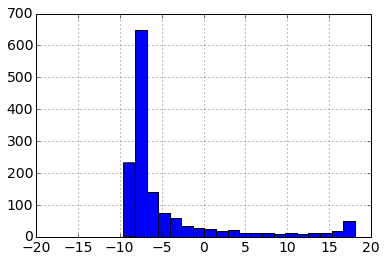

In [56]:
df['lgc_diff_2p'].hist(bins=20)
plt.xlim(-20, 20)


In [57]:
df['lgc_diff_2p'].describe()

count    1434.000000
mean       -4.512392
std         6.791500
min        -9.554774
25%        -7.886632
50%        -7.396655
75%        -4.480109
max        18.044016
Name: lgc_diff_2p, dtype: float64

In [58]:
#df['lgc_diff_sm'].hist(bins=20)
#plt.xlim(-200, 200)

In [59]:
df['h_2p'].describe()

count    1434.000000
mean      286.067304
std       120.500117
min        89.017760
25%       233.086441
50%       261.618323
75%       350.952697
max       555.114588
Name: h_2p, dtype: float64

In [60]:
#df['lgc_diff_cm'].hist(bins=20)
#plt.xlim(-200, 200)

In [61]:
#df['lgc_diff_cm'].describe()

(-0.2, 0.2)

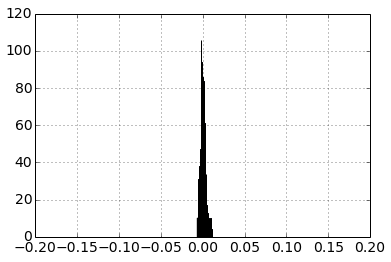

In [62]:
df['nr_diff_2p'].hist(bins=40)
plt.xlim(-0.2, 0.2)

In [63]:
df['nr_diff_2p'].describe()

count    1.434000e+03
mean    -1.176805e-16
std      3.211510e-03
min     -6.411419e-03
25%     -2.047449e-03
50%     -3.528474e-04
75%      1.745817e-03
max      1.132538e-02
Name: nr_diff_2p, dtype: float64

In [64]:
home_dir = os.getenv('HOME')
df.to_csv(os.path.join(home_dir,'Desktop/data.csv'))

In [65]:
df['nr_2p'].describe()

count    1434.000000
mean        0.949674
std         0.030045
min         0.902918
25%         0.923364
50%         0.948933
75%         0.971517
max         1.004743
Name: nr_2p, dtype: float64

In [66]:
df['phase'].describe()

count    1434.000000
mean        2.460948
std         0.703055
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: phase, dtype: float64